<a href="https://colab.research.google.com/github/ysneef/Data-Analytics-and-Deep-Learning/blob/main/2174802010854-VoHuynhNhuY-Lab04/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PHẦN 1: DATA CLEANSING & FEATURE ENGINEERING

1. Viết hàm load_data() để tải dữ liệu lên ứng dụng. Sau đó, hiển thị ra màn hình 10 dòng đầu tiên.

In [19]:
from google.colab import files
import pandas as pd

def load_data():
    # Upload file từ máy tính lên Google Colab
    uploaded = files.upload()

    # Lấy tên file đã upload
    filename = list(uploaded.keys())[0]

    # Đọc dữ liệu vào DataFrame
    df = pd.read_csv(filename)

    # Hiển thị 10 dòng đầu tiên
    print(df.head(10))

    return df

# Gọi hàm để tải và hiển thị dữ liệu
titanic_df = load_data()


Saving titanic_disaster.csv to titanic_disaster (4).csv
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6       

2. Thống kê dữ liệu thiếu trên các biến số và trực quan hóa dữ liệu thiếu bằng biểu đồ (Heat map). Hãy cho nhận xét về tình trạng thiếu dữ liệu Age, Cabin và Embarked


Số lượng dữ liệu thiếu trong các cột:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


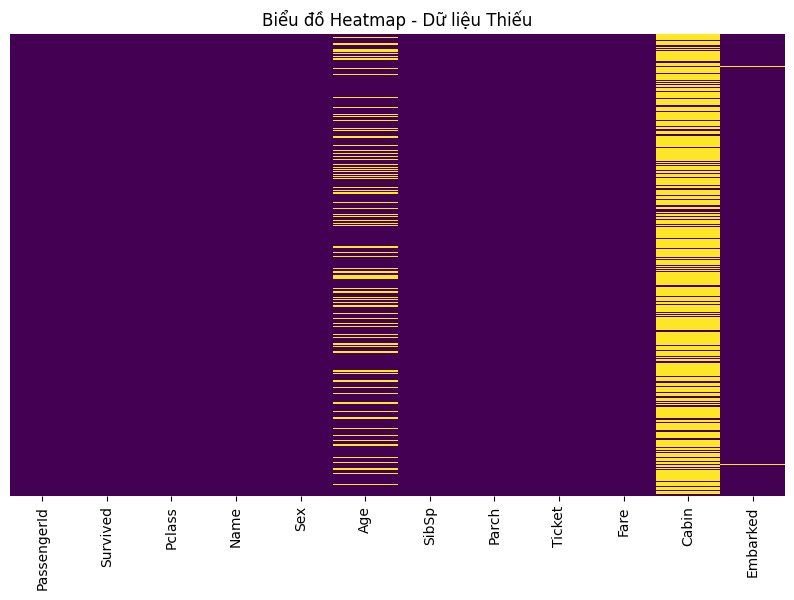

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Thống kê dữ liệu thiếu
missing_data = titanic_df.isnull().sum()
print("Số lượng dữ liệu thiếu trong các cột:\n", missing_data)

# Trực quan hóa dữ liệu thiếu bằng Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(titanic_df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Biểu đồ Heatmap - Dữ liệu Thiếu")
plt.show()


3. Xử lý tên cột tên Name, tách ra làm 2 cột: firstName và secondName. Lưu ý: Sau khi tách cột xong thì xóa luôn cột Name

In [4]:
# Tách cột 'Name' thành 'firstName' và 'secondName'
titanic_df[['firstName', 'secondName']] = titanic_df['Name'].str.split(',', expand=True)

# Xóa cột 'Name' sau khi tách
titanic_df.drop(columns=['Name'], inplace=True)

# Kiểm tra kết quả
print(titanic_df[['firstName', 'secondName']].head(10))


   firstName                                   secondName
0     Braund                              Mr. Owen Harris
1    Cumings   Mrs. John Bradley (Florence Briggs Thayer)
2  Heikkinen                                  Miss. Laina
3   Futrelle           Mrs. Jacques Heath (Lily May Peel)
4      Allen                            Mr. William Henry
5      Moran                                    Mr. James
6   McCarthy                                Mr. Timothy J
7    Palsson                        Master. Gosta Leonard
8    Johnson     Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9     Nasser                  Mrs. Nicholas (Adele Achem)


4. Xứ lý rút gọn kích thước dữ liệu trên cột Sex như sau: thay thế male → M và female → F

In [5]:
# Thay thế 'male' thành 'M' và 'female' thành 'F'
titanic_df['Sex'] = titanic_df['Sex'].replace({'male': 'M', 'female': 'F'})

# Kiểm tra kết quả
print(titanic_df[['Sex']].head(10))


  Sex
0   M
1   F
2   F
3   F
4   M
5   M
6   M
7   M
8   F
9   F


5. Xử lý dữ liệu thiếu trên biến Age bằng cách thay thế bằng giá trị trung bình tuổi: Hãy đưa ra quyết định dùng giá trị trung bình tuổi toàn bộ hành khách hay theo từng nhóm hạng vé (hạng hành khách: Pclass). Ta tiến hành làm các bước sau

a. Sử dụng Seaborn để vẽ biểu đồ (Box plot) trực quan dữ liệu để xác định phân
phối tuổi trên từng hạng hành khách. Nhận xét về tuổi trung bình giữa các nhóm
hành khách. Từ đó đưa ra quyết định cách thay thế giá trị tuổi bị thiếu.






<ipython-input-6-83201a4dce77>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Age', data=titanic_df, palette="pastel")


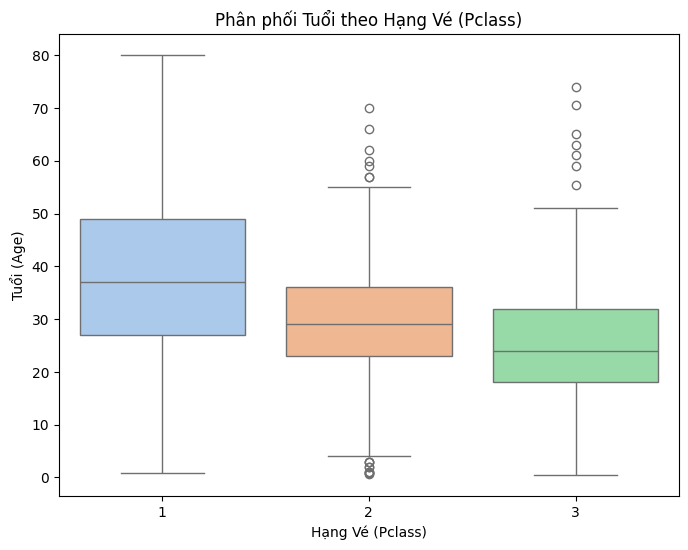

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Vẽ Box Plot để hiển thị phân phối tuổi theo từng hạng vé (Pclass)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Age', data=titanic_df, palette="pastel")

# Thêm tiêu đề và nhãn trục
plt.title("Phân phối Tuổi theo Hạng Vé (Pclass)")
plt.xlabel("Hạng Vé (Pclass)")
plt.ylabel("Tuổi (Age)")

# Hiển thị biểu đồ
plt.show()


b. Tiến hành thay thế giá trị Age bị thiếu. Sau đó, hiển thị kết quả dạng bảng và trực quan dữ liệu đã xử lý thiếu cho cột’Age’ bằng biểu đồ Heat map.

In [26]:
titanic_df["Age"][titanic_df["pclass"] == 1] = titanic_df["Age"][titanic_df["pclass"] == 1].fillna(titanic_df["Age"][titanic_df["pclass"] == 1].median(), inplace=False)

KeyError: 'pclass'

Số lượng giá trị thiếu trong cột Age sau khi xử lý: 0
   Pclass       Age
0       3  22.00000
1       1  38.00000
2       3  26.00000
3       1  35.00000
4       3  35.00000
5       3  25.14062
6       1  54.00000
7       3   2.00000
8       3  27.00000
9       2  14.00000


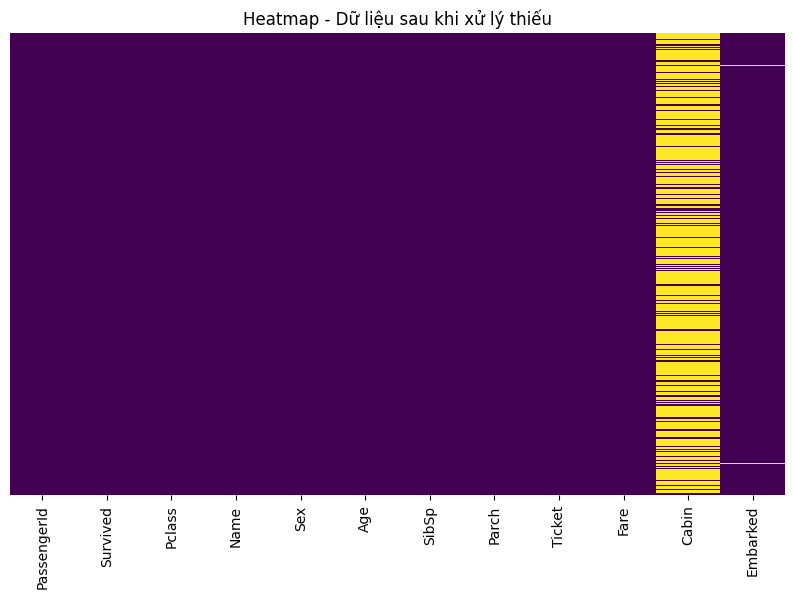

In [20]:
# Thay thế giá trị thiếu trong cột 'Age' bằng giá trị trung bình của từng nhóm Pclass
titanic_df['Age'] = titanic_df.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.mean()))

# Kiểm tra lại xem còn giá trị thiếu không
print("Số lượng giá trị thiếu trong cột Age sau khi xử lý:", titanic_df['Age'].isnull().sum())

# Hiển thị bảng kết quả sau khi xử lý
print(titanic_df[['Pclass', 'Age']].head(10))


import seaborn as sns
import matplotlib.pyplot as plt

# Vẽ Heatmap để kiểm tra dữ liệu thiếu sau khi xử lý
plt.figure(figsize=(10, 6))
sns.heatmap(titanic_df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Heatmap - Dữ liệu sau khi xử lý thiếu")
plt.show()


6. Xây dựng biến số Agegroup có thang đo thứ tự được ánh xạ theo thang đo khoảng dựa trên độ tuổi của hành khách như sau: (age =< 12] → Kid; (12, 18]: Teen, (18, 60]: Adult và ( age > 60): Older

In [22]:
titanic_df.loc[(titanic_df['Age']<=12), 'Agegroup'] = 'Kid'
titanic_df.loc[(titanic_df['Age']>12) & (titanic_df['Age']<=18), 'Agegroup'] = 'Teen'
titanic_df.loc[(titanic_df['Age']>18) & (titanic_df['Age']<=60), 'Agegroup'] = 'Adult'
titanic_df.loc[(titanic_df['Age']>60), 'Agegroup'] = 'Older'
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agegroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult


7. Tiến hành thêm đặc trưng về danh xưng (namePrefix) trong xã hội bằng cách tách Mr, Mrs, Miss, Master ra khỏi “secondName”


In [25]:
listNamePrefix=[]
for index, row in titanic_df.iterrows():
    #tim khoang trang dau tien
    vitri = row['secondName'].strip().find(' ')
    secondname = row['secondName'].strip()
    #s[bd]
    namePrefix = secondname[vitri+1:]
    listNamePrefix.append(namePrefix)

cotNamePrefix = pd.DataFrame(listNamePrefix, columns=['namePrefix'])
titanic_df = pd.concat([titanic_df, cotNamePrefix], axis=1, sort=False)

print(titanic_df)

KeyError: 'secondName'

8. Khai thác thêm thông tin số lượng thành viên đi theo nhóm thân quen (familySize) đối với mỗi hành khách trên chuyến hải trình; family size = 1+ SibSp + Parch

9. Tạo thêm đặc trưng ‘Alone’ để xác định hành khách đi theo nhóm hay cá nhân bằng cách dựa trên familySize như sau: Nếu familySize = 0 thì giá trị Alone = 1 và ngược lại là 0.

10. Tiến hành tách loại cabin (typeCabin) mà hành khách ở để lọc và phân tích đặc tính cabin. Loại cabin được kí hiệu bởi chữ cái đầu tiên. Lưu ý: Đối với dữ liệu cabin bị thiếu thì thay thế bằng “Unknown”


11. Loại bỏ dữ liệu thừa đối với các hành khách xuất hiện trong cả 2 tập dữ liệu huấn luyện (train.csv) và đánh giá (test.csv). Ưu tiên giữ lại dữ liệu trong tập huấn luyện.